In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [4]:
data = pd.read_csv("/content/climate_change.csv")
data.head(5)

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
0,1983,5,2.556,345.96,1638.59,303.677,191.324,350.113,1366.1024,0.0863,0.109
1,1983,6,2.167,345.52,1633.71,303.746,192.057,351.848,1366.1208,0.0794,0.118
2,1983,7,1.741,344.15,1633.22,303.795,192.818,353.725,1366.2850,0.0731,0.137
3,1983,8,1.130,342.25,1631.35,303.839,193.602,355.633,1366.4202,0.0673,0.176
4,1983,9,0.428,340.17,1648.40,303.901,194.392,357.465,1366.2335,0.0619,0.149


In [5]:
data.shape

(308, 11)

In [6]:
data.describe()

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
count,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000
mean,1995.662338,6.551948,0.275555,363.226753,1749.824513,312.391834,251.973068,497.524782,1366.070759,0.016657,0.256776
std,7.423197,3.447214,0.937918,12.647125,46.051678,5.225131,20.231783,57.826899,0.399610,0.029050,0.179090
min,1983.000000,1.000000,-1.635000,340.170000,1629.890000,303.677000,191.324000,350.113000,1365.426100,0.001600,-0.282000
25%,1989.000000,4.000000,-0.398750,353.020000,1722.182500,308.111500,246.295500,472.410750,1365.717050,0.002800,0.121750
50%,1996.000000,7.000000,0.237500,361.735000,1764.040000,311.507000,258.344000,528.356000,1365.980900,0.005750,0.248000
75%,2002.000000,10.000000,0.830500,373.455000,1786.885000,316.979000,267.031000,540.524250,1366.363250,0.012600,0.407250
max,2008.000000,12.000000,3.001000,388.500000,1814.180000,322.182000,271.494000,543.813000,1367.316200,0.149400,0.739000


In [7]:
#finding inter quartile range (IQR) to remove outliers
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
lower_range = Q1 - 1.5 * IQR
upper_range = Q3 + 1.5 * IQR
print(IQR)
data = data[~((data < lower_range) |(data > upper_range)).any(axis=1)]
data.shape

Year        13.00000
Month        6.00000
MEI          1.22925
CO2         20.43500
CH4         64.70250
N2O          8.86750
CFC-11      20.73550
CFC-12      68.11350
TSI          0.64620
Aerosols     0.00980
Temp         0.28550
dtype: float64


(243, 11)

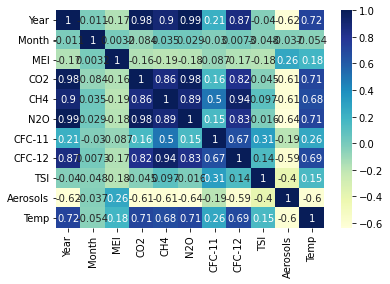

In [8]:
c = data.corr()
sns.heatmap(c, cmap = 'YlGnBu', annot = True)# annot for writing data value in each cell

In [9]:
df1 = data[data.iloc[:,0]<=2006] 
df2 = data[data.iloc[:,0]>2006]  

x = data[['MEI', 'CO2', 'CH4', 'N2O', 'CFC-11', 'CFC-12', 'TSI', 'Aerosols']]
y = data['Temp']
x_train = df1[['MEI','CO2', 'CH4', 'N2O', 'CFC-11', 'CFC-12', 'TSI', 'Aerosols']]
y_train = df1['Temp']
x_test = df2[['MEI', 'CO2', 'CH4', 'N2O', 'CFC-11',  'CFC-12', 'TSI', 'Aerosols']]
y_test = df2['Temp']

In [10]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()  
mlr.fit(x_train, y_train)
print("Coefficients:")
list(zip(x, mlr.coef_))

Coefficients:


[('MEI', 0.06223569777302381),
 ('CO2', 0.0049606987940408465),
 ('CH4', -0.00038810727802363575),
 ('N2O', 0.0018262419311547184),
 ('CFC-11', -0.0011344993284555694),
 ('CFC-12', 0.0014013277032073551),
 ('TSI', 0.03604734063953119),
 ('Aerosols', -8.435947559286046)]

In [11]:
#Prediction of test set
y_pred_mlr= mlr.predict(x_test)
#Predicted values
print("Prediction for test set: {}".format(y_pred_mlr))

Prediction for test set: [0.47395865 0.4503635  0.43347525 0.43430288 0.45407379 0.42558192
 0.4256269  0.40086034 0.34299562 0.34452906 0.34506256 0.3546125
 0.37297068 0.35481019 0.34472978 0.3962589  0.43969896 0.46681556
 0.45350739 0.42400764 0.38408517 0.36584435 0.38171572 0.3874683 ]


In [12]:
#Actual value and the predicted value
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr})
mlr_diff.head()

,Actual value,Predicted value
284,0.601,0.473959
285,0.498,0.450364
286,0.435,0.433475
287,0.466,0.434303
288,0.372,0.454074


In [13]:
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))
print('R squared: {:.2f}'.format(mlr.score(x,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 69.69
Mean Absolute Error: 0.07881358260266709
Mean Square Error: 0.01062595645613692
Root Mean Square Error: 0.10308228002977486
